In [5]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Introduction

To find the best neighborhood in Pittsburgh we went through a multitude of data sets to find some common ground that would help determine what "best" truly meant in this context. Our main goal when choosing a mettic was uniqness and from that we decided that our overarching metric should be determined on how easy it is to commit arson. More specifically which neighborhood would lead to the most destruction when set on fire as it seemed unique enough which made the project entertianing. As we scoured the data sets in the WPRDC data base it we tried to find data sets that could be argued for our metric as it is difficult to find speciic data sets relating to arson. 

# Metric 1: Number of Houses [Arvind Sundar]

The main goal for using this metric was to choose a neighborhood with the most number of houses which would lead to the most amount of damage when set on fire. I broke this down to a further to analyze which neighborhood has the most amount of "rich houses" or in other words expensive houses. The range for this second subset includes houses from 300k dollars and above. 

**About the data set:** I used a data set that lists all the neighborhoods in Pittsburgh along with the number of houses that are in those neighborhoods in different price ranges.

**Data Set Link:** https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/13982f58-e618-400c-8f69-6a32dbd7c68f/download/value.csv

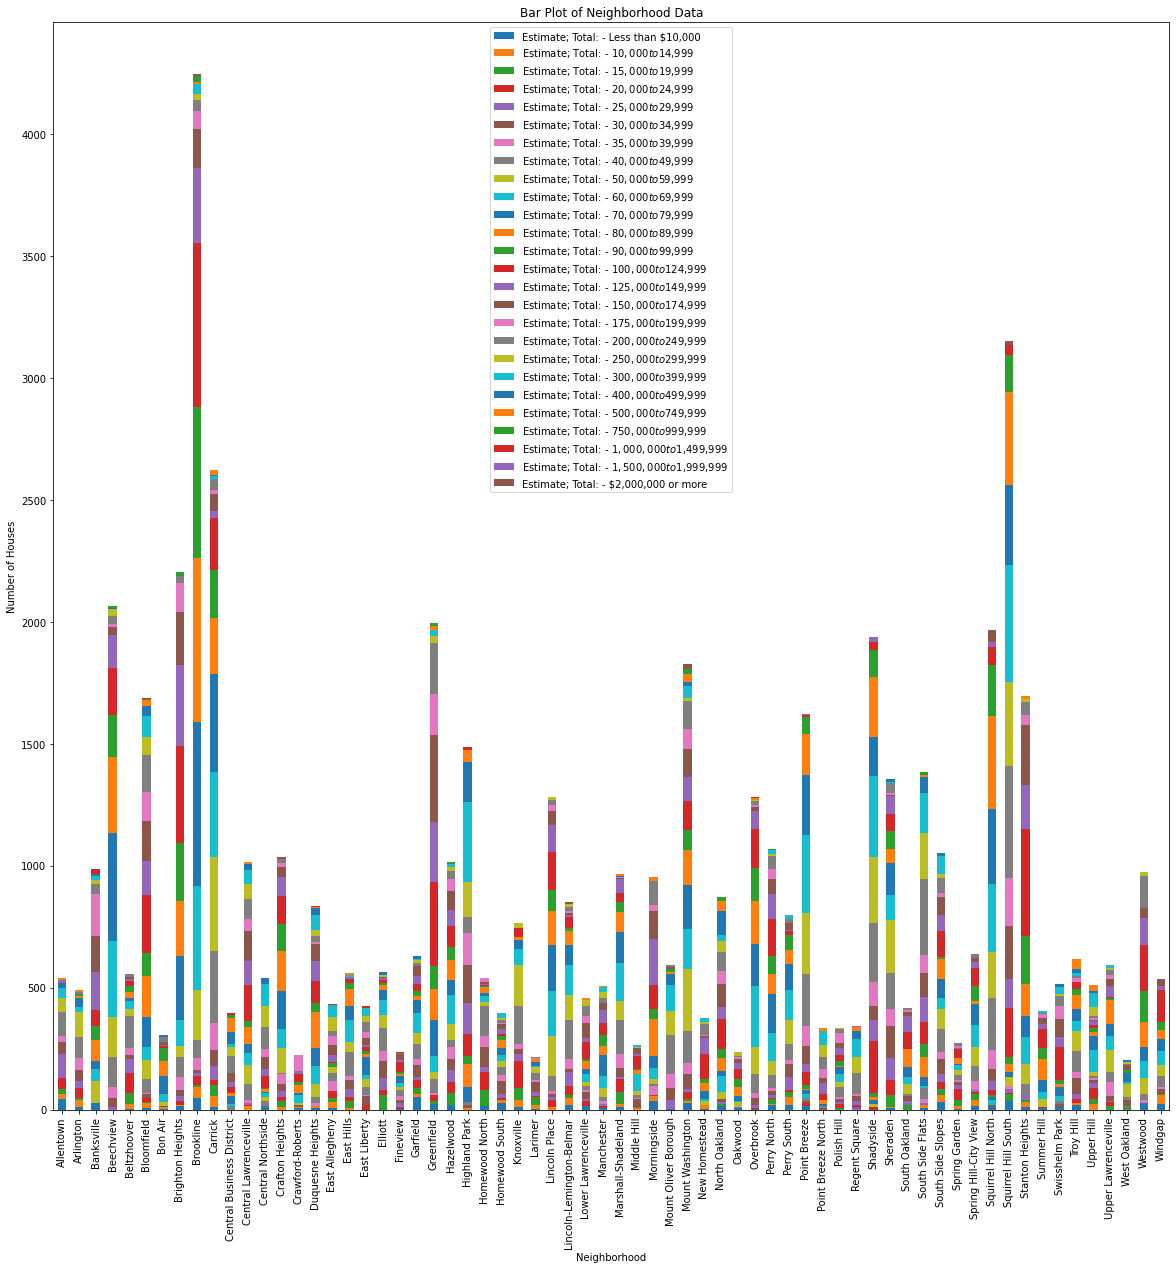

In [3]:
#This code filters the data set into the 
#important values needed to graph the different house price ranges and the numebr of houses in each neighborhood
data = pd.read_csv("value.csv")
NDF = data[data["Estimate; Total:"] >= 200]

Remove_Columns = [col for col in NDF.columns if "Margin" in col]
NDF = NDF.drop(columns=Remove_Columns)
NDF = NDF.drop(columns="Id")
NDF = NDF.drop(columns="Estimate; Total:")

New_File_path = 'New_Values.csv'
NDF.to_csv(New_File_path, index=False)

NDF.plot.bar(stacked =True, x = "Neighborhood", figsize = (20,20))

plt.xlabel('Neighborhood')
plt.ylabel('Number of Houses')
plt.title('Bar Plot of Neighborhood Data')

plt.legend()

plt.show()

Graph 1 Results: From this graph it is clear that Brookline heights is number one choice for most amount of houses, however the goal of this metric is to show which neighborhood would cause the most damage and burning more expensive houses causes more fiscal damage and thus is more detrimental.

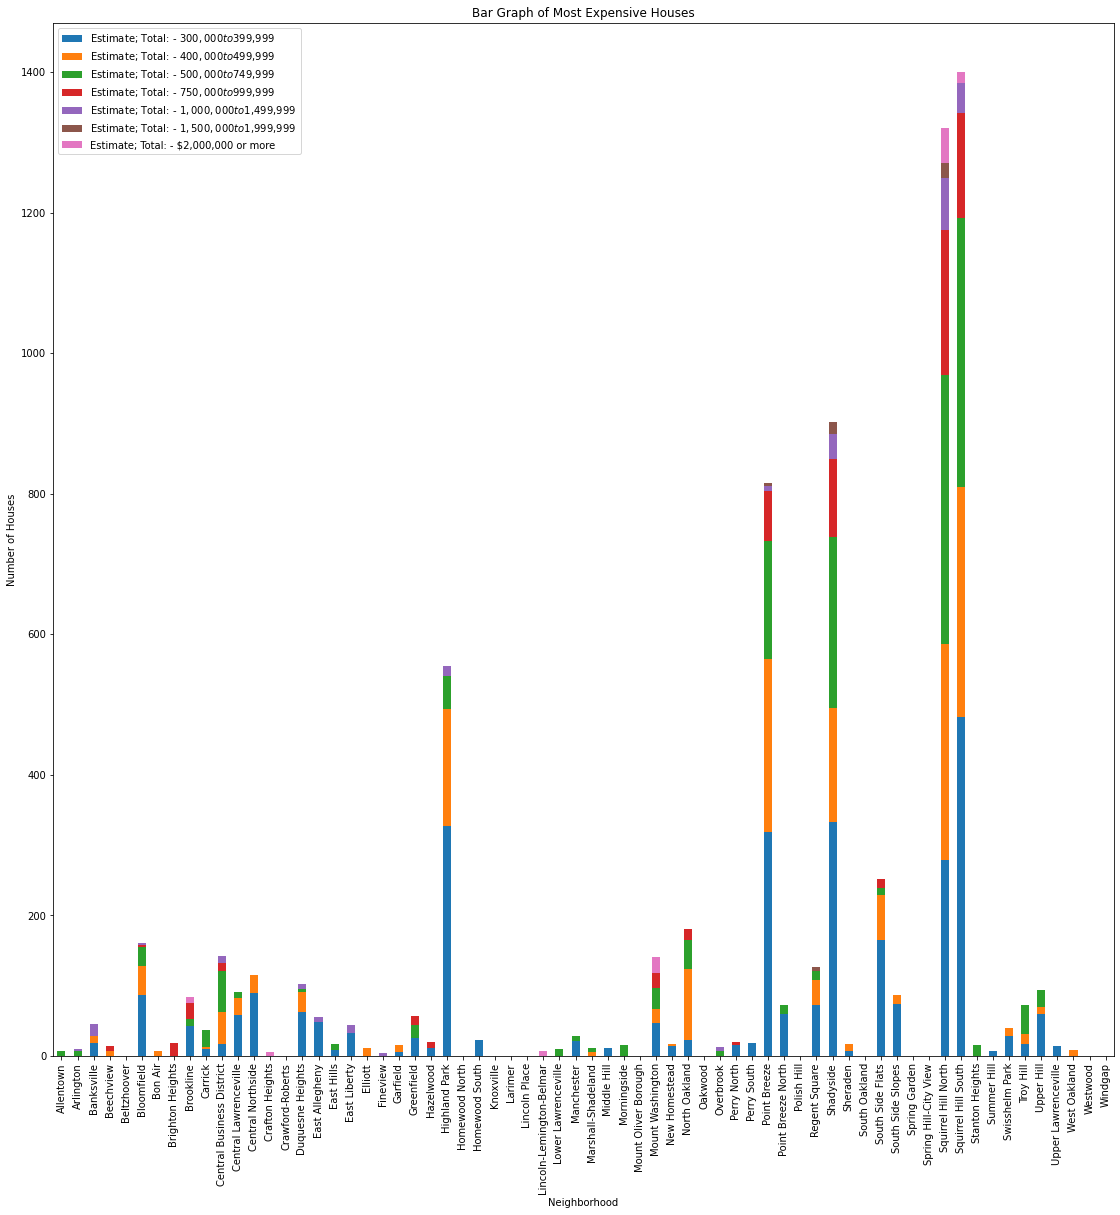

In [3]:
#This code further filers the previous data set into only representing houses that range from 
#300k and above and which neighborhood has the most amount of expensive houses
richHouseColumns = [20, 21, 22, 23, 24, 25, 26]

richHouses = NDF.columns[richHouseColumns]

NDF.set_index('Neighborhood')[richHouses].plot.bar(stacked =True, figsize = (19,19))

plt.title('Bar Graph of Most Expensive Houses')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Houses')
plt.legend(labels=richHouses)
plt.show()

Graph 2 Result: From this graph it's clear to see that Squirrel Hill North and South have the most amount of expensive houses compared to the other neighborhoods meaning that those are the best places to commit arson which would cause the most amount of fiscal damage.

# Metric 2: Number of Trees [Astalaxmi D]

The more the trees, the easier it is to start a fire and the more widespread the fire is. This dataset contains data only about trees in parks and public roads making it ideal to find which neighborhood has the most number of trees in proximity to residential or highly populated areas making the fire's impact more profound.

**About the dataset:** This dataset contains data about trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division. The forestry division is responsible for the care and maintenance of trees within the right-of-way and City Parks.

**Data Set Link:** https://data.wprdc.org/dataset/city-trees/resource/1515a93c-73e3-4425-9b35-1cd11b2196da

<ipython-input-6-44d0bd1be50e>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('trees.csv')


Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2083
South Side Flats       1693
Shadyside              1558
                       ... 
Arlington Heights         5
Esplen                    3
South Shore               2
Glen Hazel                2
Hays                      1
Name: neighborhood, Length: 90, dtype: int64




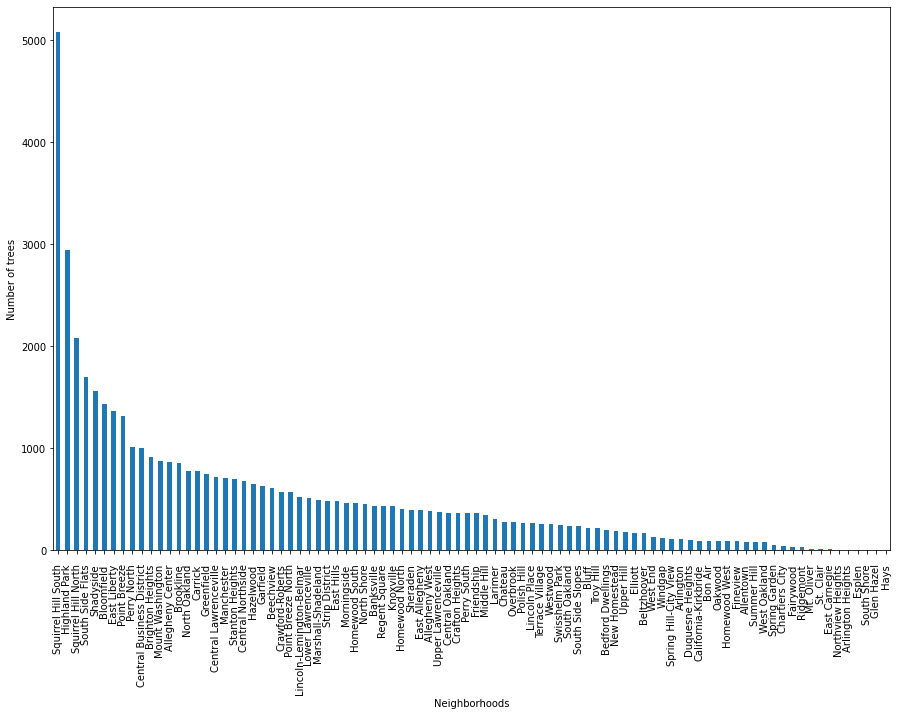

In [6]:
df = pd.read_csv('trees.csv')
print(df['neighborhood'].value_counts().head(45709))
print()
print()
df['neighborhood'].value_counts().plot(kind='bar',figsize=(15, 10))
plt.xlabel("Neighborhoods")
plt.ylabel("Number of trees")
plt.tick_params(axis='x', which='major', pad=10)

Results: Only considering the number of trees submetric, Squirrel Hill South would be the best and easiest neighborhood to start a widespreading fire with a profound impact. Higland park, Squirell Hill North, South Side Flats and Shadyside are in the top 5 best neighborhoods to start a fire.Perhaps one of the these neighborhoods might be the best overall after considering the other two metrics.

# Metric 3: Traffic Congestion [Rebekka Hubrich]

The metric I decided to look into was traffic. The idea behind that is that since we want to do a lot of destruction by comming arson we would want a scenario in which help wouldn't be able to get there quickly, specifically emergency vehicles. With higher levels of traffic it would be more difficult for emergencey vehicles to get to the situation and therefore a higher potential to do.

**About data set:** This data set shows the daily average traffic along with other road metrics like speed limit to represent the traffic congestion in different neighborhoods around Pittsburgh. 

**Data Set Link:** https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167

In [7]:
NEIGHBORHOODS = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")

traffic_data = pd.read_csv('https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167', index_col="neighborhood",parse_dates=True)
traffic_data2 = pd.DataFrame(traffic_data)
traffic_data.head()

def geo_to_neighborhood(latitude, longitude):
    """Converts a geolocation (latitude and longitude) to a Pittsburgh neighborhood name.

    Args:
        latitude (float): The latitude of the point.
        longitude (float): The longitude of the point.

    Returns:
        Union[str, None]: Name of the Pittsburgh neighborhood the point falls within or None if it does not fall within a neighborhood.
    """
    # Create a shapely point for the latitude and longitude
    pt = Point(longitude, latitude)
    # Loop through the neighborhoods
    for _idx, neighborhood in NEIGHBORHOODS.iterrows():
        # Check if this neighborhood contains the point
        if neighborhood["geometry"].contains(pt):
            # Return the name of the neighborhood
            return neighborhood["hood"]
    # Wasn't contained in the neighborhood
    return None

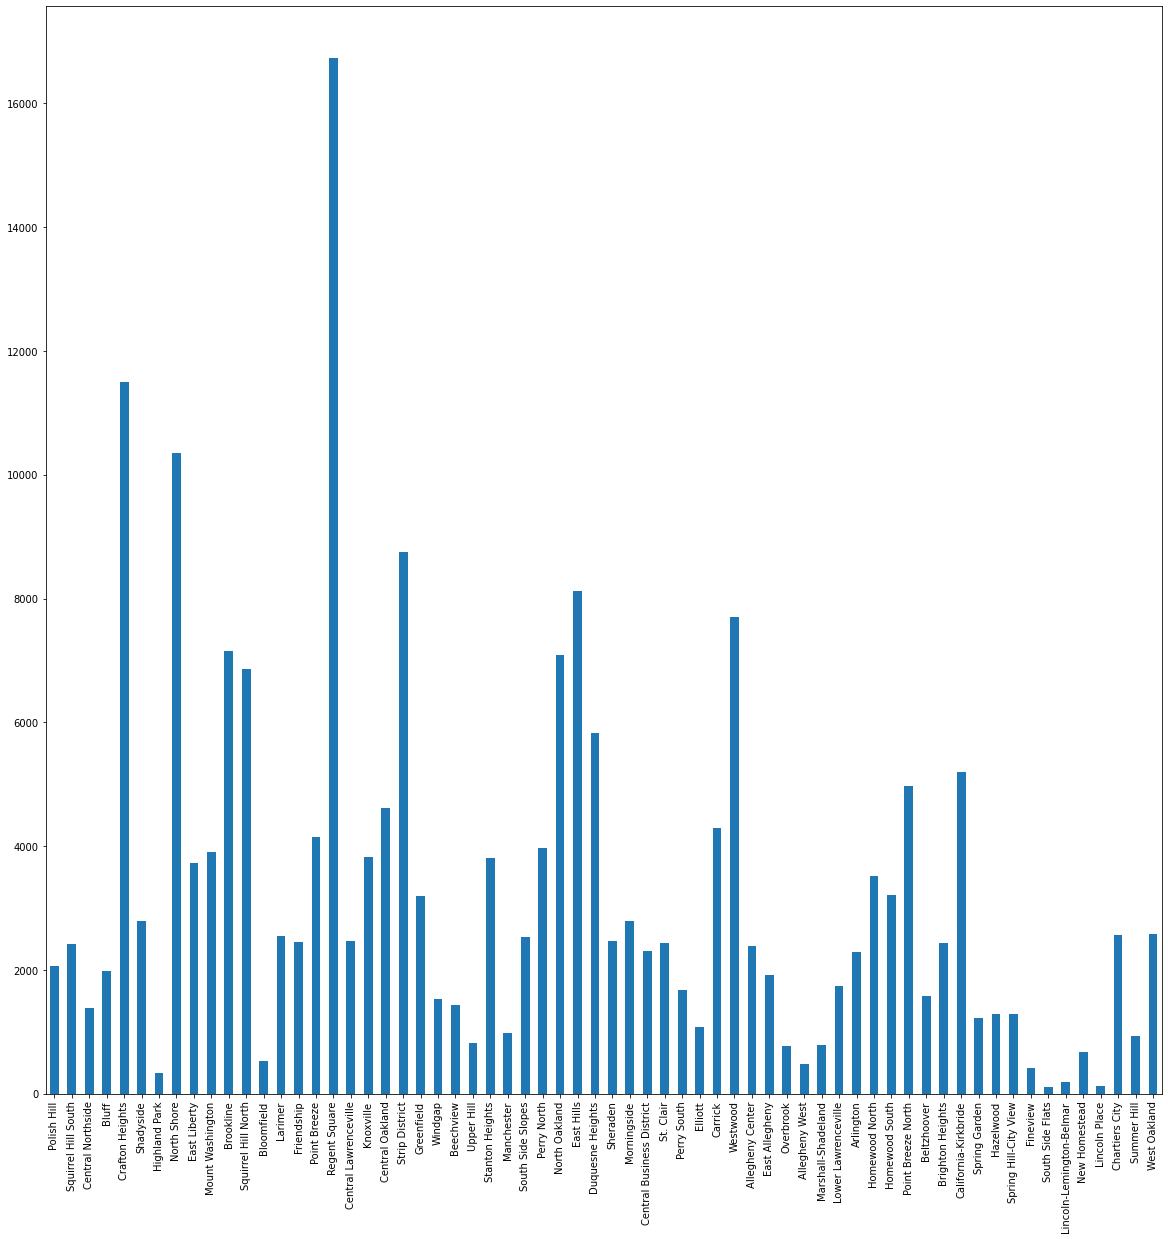

In [8]:
neighborhoods = {}
traffic_data2.dropna(subset = ['average_daily_car_traffic'], inplace=True)
for index, row in traffic_data2.iterrows():
    neighborhood = geo_to_neighborhood(row['latitude'],row['longitude'])
    if neighborhood in neighborhoods.keys():
        if row["average_daily_car_traffic"]=='NaN':
            i=4
        else:
           neighborhoods[neighborhood] = (neighborhoods[neighborhood]+row['average_daily_car_traffic'])/2
    elif neighborhood == None:
        i = 4
    else:
        if row["average_daily_car_traffic"]=='NaN':
            i=4
        else:
            neighborhoods[neighborhood]=row["average_daily_car_traffic"]

neighborhoodsDF = pd.DataFrame(neighborhoods,index=neighborhoods.keys())
neighborhoodsDF.mean().plot(kind='bar',figsize=(20,20))
#neighbhorhoods.plot(kind='bar')

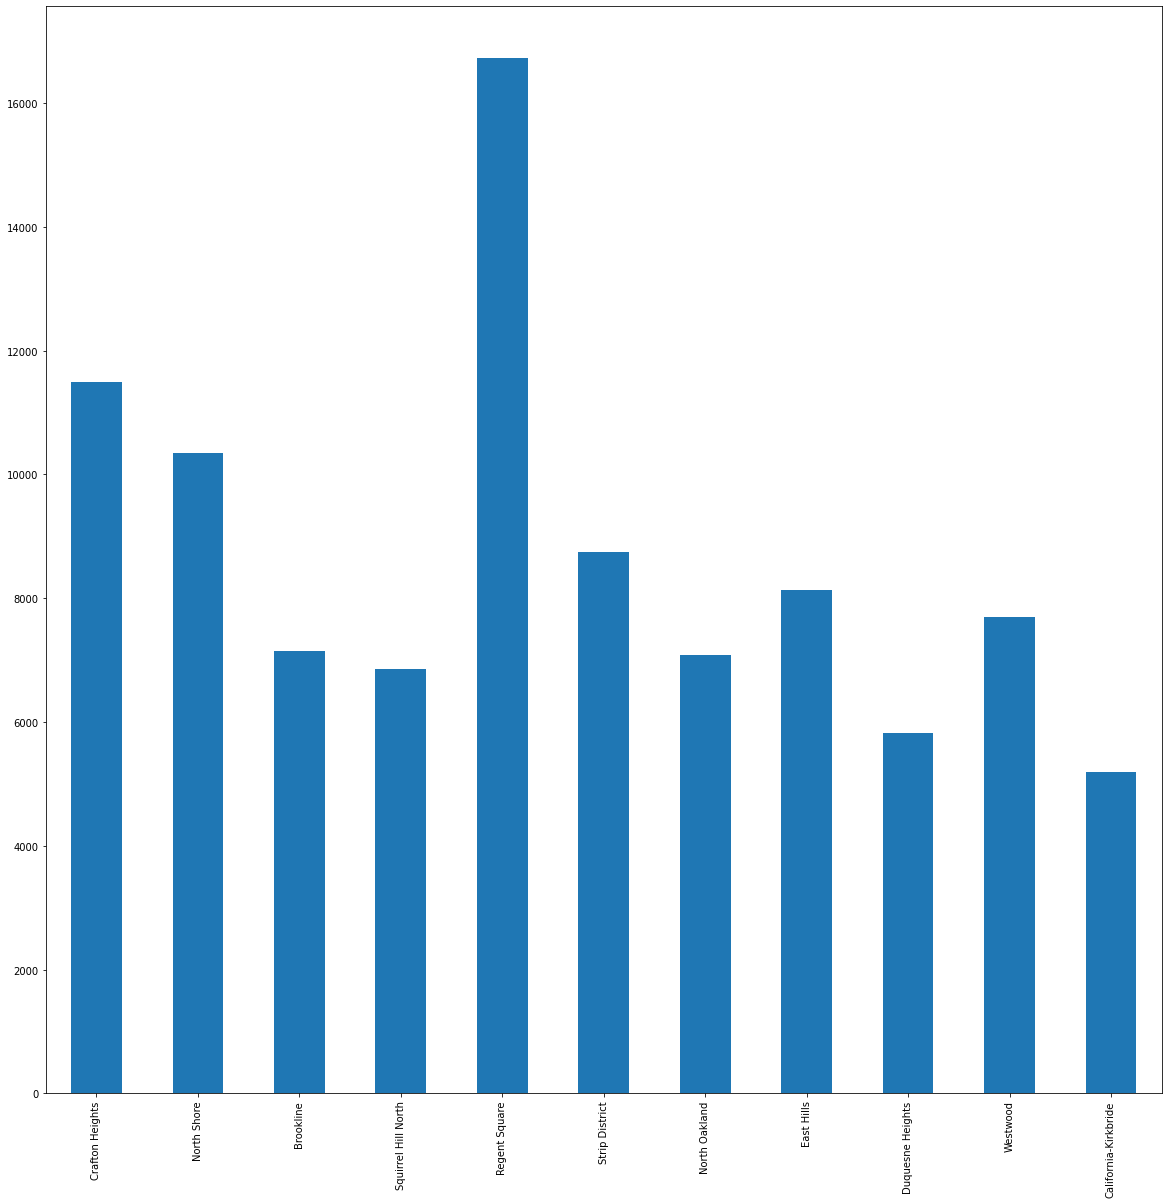

In [9]:
query_mask = neighborhoodsDF.mean()>5000
stripped = neighborhoodsDF.mean()[query_mask]
stripped.plot(kind='bar',figsize=(20,20))

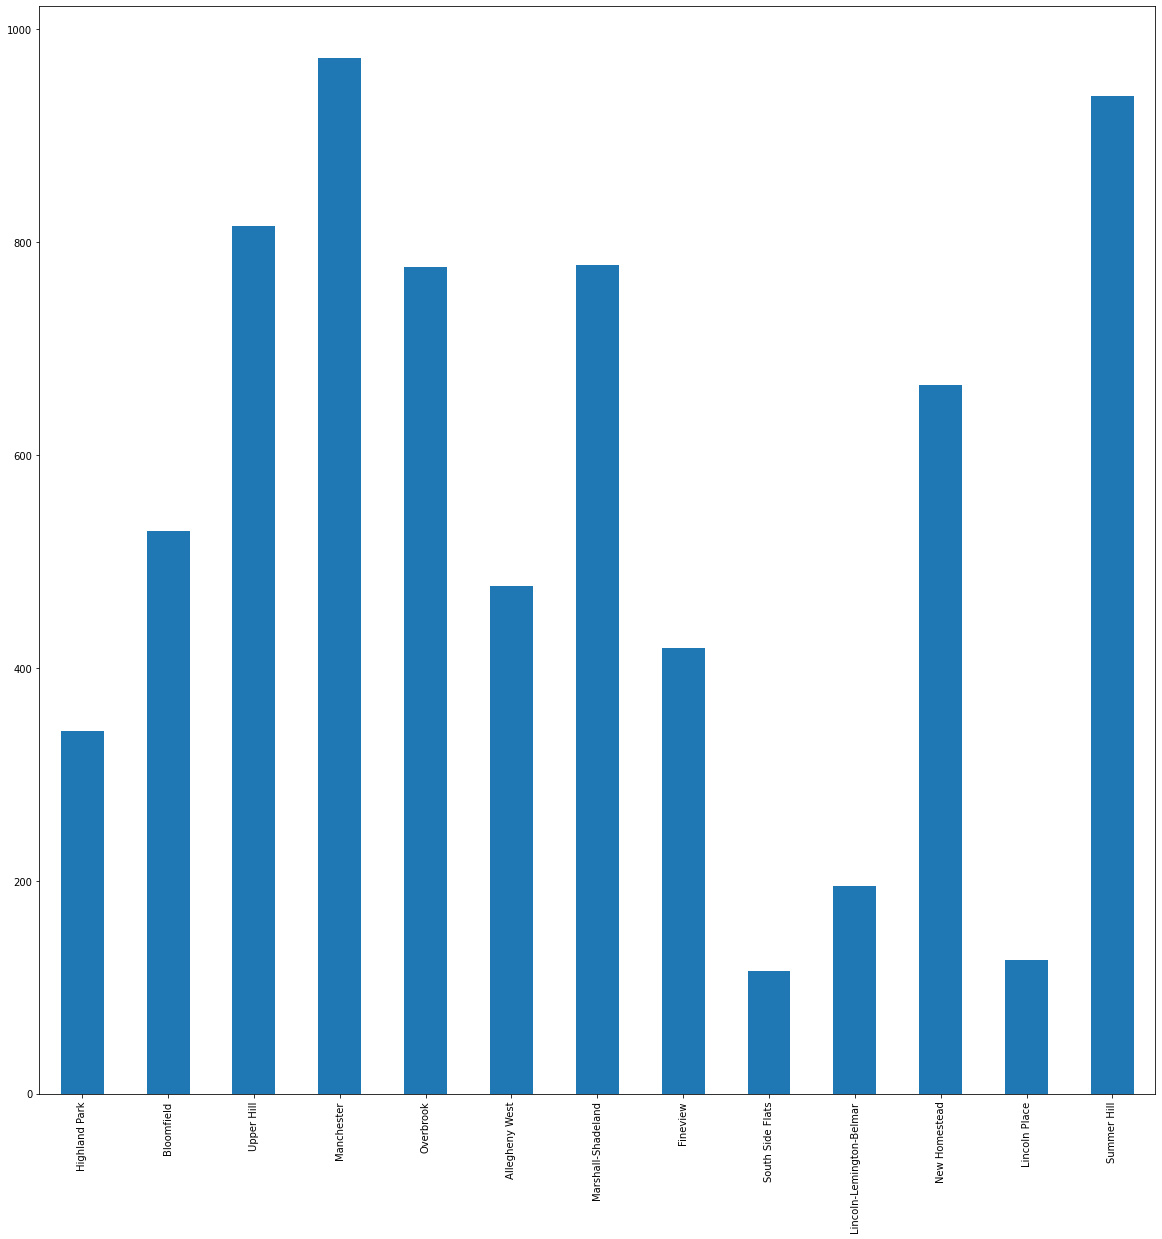

In [10]:
query_mask2 = neighborhoodsDF.mean()<1000
stripped2 = neighborhoodsDF.mean()[query_mask2]
stripped2.plot(kind='bar',figsize=(20,20))

Results: Regent square seems to have the most traffic by a pretty long shot, but also any marked in that graph could be reasonable contenders. Any in the bottom graph, especially South Side Flats and Lincoln Place would not be great contenders. I do personally like South Side, so I suppose that my own tastes do not exactly align with the data conveyed by this metric, however that can also be expected since I do not think I would actually love to be in a space where arson was committed.

# Overall Results

After some deliberation and analyzing, we decided that the best neighborhood to start a fire and commit arson to be is Squirrel Hill North. Now this may seem surprising as it never came out on top in any of the data sets as shown in the graphs, however it managed to show consistency in all three data sets for being highly ranked. Squirrel Hill South came out on top on two data sets that being having the most expensive houses and having the most amount of trees, these metrics would be good for commiting arson however it ranked very low when it came to traffic congestion meaning that emergency vehical response time would be short and thus arson would be harder to commit. Where as Squirrel Hill North ranked 2nd highest in house values, came in the top 3 of number of trees, and it also ranked higehr than Squirrel Hill South when it came to traffic congestion. Due to these factors, Squirrel Hill North ranked higher than the other neighborhoods and was deemed the best neighborhood to commit arson.


# Personal Opinions

**Arvind**: Because I am not really a Pittsburgh native, I don't really have a strong opionion on what my favoirte neighborhood is personally as I have never been to any of them, however based on the data in my data set I find that Squirrel Hill South and Squirrel Hill North to be the most interesting as they have the most amount of expensive houses which would lead to the most amount of damage if set on fire. This is mainly based on the data driven determination of what is the best neighborhood as I do not really know any of these places personally. Despite this, I still think that there other good neighborhoods to start a fire as well such as Brookline Heights soley based on the fact that it has the most amount of houses compared to all Pittsburgh neighborhoods.


**Rebekka:** I’ve personally never been to Squirrel Hill North, so it’s hard for me to say my opinion on it, however traffic, trees, and house value are not the most important metrics for me as in general I do not go around thinking about the best places to commit arson. Things I am more willing to take concern over are food locations, safety, (which traffic could contribute against) and cool sights. For example, I really like Southside because there’s a lot of cool shopping. Therefore, while I cannot say I would not like Squirrel Hill North I am inclined to believe that it would not be my favorite neighborhood. 

**Astalaxmi:** Considering only the number of trees submetric, Squirrel Hill South emerges as the best neighborhood to initiate a widespread fire with a profound impact. Highland Park, Squirrel Hill North, South Side Flats, and Shadyside rank within the top 5 neighborhoods for starting a fire. I initially thought that one of these top 5 neighborhoods might be the best overall, taking into account the other two metrics. Upon examining all the datasets, it became apparent that Squirrel Hill North consistently was in the one of top positions, aligning with my initial guess.
Despite this, my favorite neighborhood is Squirrel Hill North, primarily due to its greenery. The revelation that it is also the best neighborhood to start a fire is both interesting and disheartening.
In reflecting on the data-driven determination of the "best neighborhood," it contrasts with my personal favorite. While Squirrel Hill North stands out in terms of fire initiation impact, my personal preference is driven by the neighborhood's greenery, emphasizing the disparity between quantitative metrics and subjective, personal criteria.

